
Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за такую хорошую работу, мне она очень понравилась 
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
* Тебе удалось успешно справиться с текущей задачей. Поздравляю!
* Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту.


<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.
</div>

# 1 Общая информация

## 1.1 Название: Рекомендация тарифов клиентам мобильной связи «Мегалайн»

## 1.2 Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».  

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.  

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

   * `сalls` — количество звонков,
   * `minutes` — суммарная длительность звонков в минутах,
   * `messages` — количество sms-сообщений,
   * `mb_used` — израсходованный интернет-трафик в Мб,
   * `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## План работ
   * Загрузка данных
   * Сбор статистики
       * написание функций, которые в одну строчку позволяли бы получать параметры обученной модели
       * массовый прогон в цикле по нескольким гиперпараметрам, с сохранением результатов в отдельный датафрейм
   * Обработка результатов обучения разных моделей
       * визуализация результатов
       

Установим актуальную на текущий версию пакета с самописными функциями:

In [1]:
!pip install gonchaya==0.0.5

Импортируем нужные модули и функции:

<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> добавил загрузку seaborn. Здесь и далее, если вносились изменения в код, добавляется комментарий с версией. В данном случае # v2 - строка добавлена во 2-й версии. Если вся ячейка добавлена полностью, то это помечается комментарием "# v2" в первой строке ячейки.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>



In [2]:
import pandas as pd
from gonchaya import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.gridspec import GridSpec
import time
import seaborn as sns # v2
from sklearn.dummy import DummyClassifier # v2


<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что собираешь все импорты в верхней части ноутбука! 
Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>


<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">

## Откройте и изучите файл
</div>

Загрузим датафрейм (в локальном репозитории добавлен в .gitignore):

In [3]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    try:
        data = pd.read_csv(
'/home/padla/git/ds-72_09-introduction-to-machine-learning_cross-review/users_behavior.csv')
    except:
        data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> Тут удалил 2 ячейки с закоментаренными командами (как-то упустил при первой отправке)
</div>

Создадим хеш функцию, которая без коллизий переводит маленькие числа в большие псеводслучайные. Воспользуемся дискретным логарифмированием result(i)=(i\*b mod a). Воспользуемя математическими свойствами колец: для того, чтобы коллизий не было, достаточно, чтобы оба числа a и b были простыми. Выберем 2 больших простых числа: a=1875431326548658517, b=6723657243463463623

upd: при попытке использовать эти числа в качестве аргумента random_state, программа вывалилась с ошибкой:

```
ValueError: Seed must be between 0 and 2**32 - 1
```

Ну ок. Найдем самое большое простое число в этом диапазоне:

```bash
$ let "q=2**32-5"; echo $q
4294967291
$ openssl prime $q
FFFFFFFB (4294967291) is prime
```


In [5]:
def psevdo_rnd(i): return (i * 6723657243463463623) % 4294967291 #1875431326548658517

Хоть это не обязательно (спасибо математике), удостоверимся, что коллизий нет (проверим первые 10 тысяч):

In [6]:
tmp = []
for i in range(10000): tmp.append(psevdo_rnd(i))
len(tmp) == len(set(tmp))

True

In [7]:
tmp[:5]

[0, 2259376128, 223784965, 2483161093, 447569930]

Выбор равномерно распределенных псеводслучайных чисел в качестве затравки позволит исключить влияние соседних элементов, если оно присутствует. Числа выглядят достаточно большими, между соседними элементами связи не просматривается. (Один из тех немногих случаев, когда быстрее свою функцию написать, чем анализировать встроенную. В данном случае rnd на коллизии.)



<div class="alert alert-block alert-success">
    
<b>Успех:</b> 👍
</div>


<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">

## Разбейте данные на выборки

## Исследуйте модели

## Проверьте модель на тестовой выборке

## (бонус) Проверьте модели на адекватность

</div>

<div class="alert alert-info">
<b>Совет:</b>

Также важно изучить корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод `sns.pairplot` с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать в текущем или последующих проектах.
</div>


<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> Пробую:
</div>

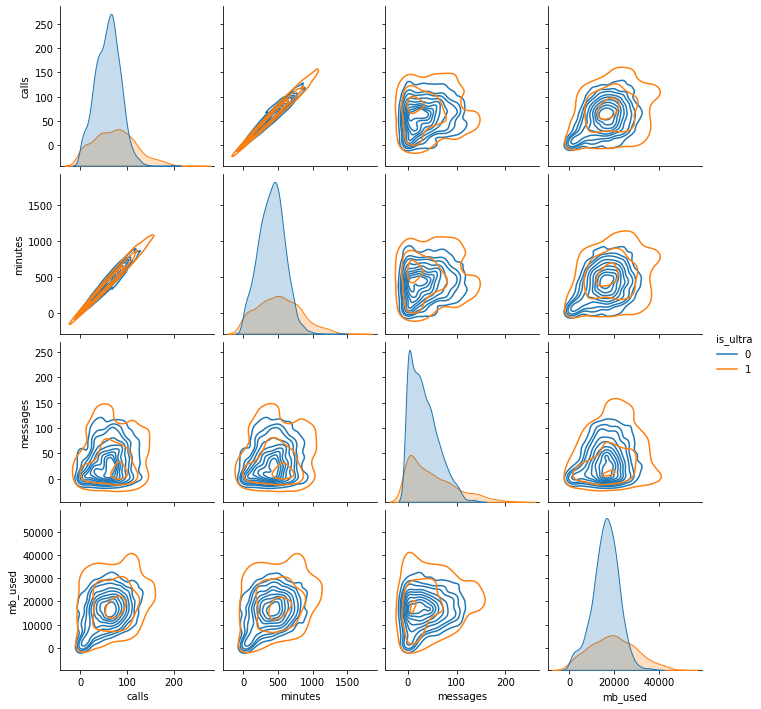

In [8]:
# v2
tmp = sns.pairplot(data, hue='is_ultra', kind='kde')

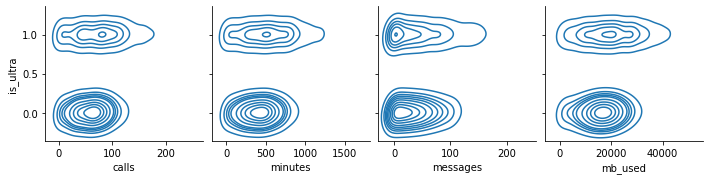

In [9]:
# v2
tmp = sns.pairplot(data, kind='kde', x_vars=['calls','minutes','messages','mb_used'], y_vars=['is_ultra'])

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Можно увидеть корреляцию между звонками и минутами, это называется мультиколленаиарностью. Если мы удалим один из признаков, это может положительно сказаться на эффективности моделей
</div>


Далее напишем 2 функции:
* одна по заданным параметрам создает модель, обучает ее, вычисляет accuracy при заданных гиперпараметрах. Попутно фиксирует время на обучение и предсказание.  
* вторая просто складывает всё накопленное первой функцией богатство информации в датафрейм.

In [10]:
df = {}
features = {}
target = {}
accuracy = {}
time_work = {}

def get_model_stat(**kwargs):
    time_start = time.time()
    global features
    global target
    global accuracy
    global time_work
    global df_stat
    cur_model = kwargs['model']
    _ = kwargs.pop('model')
    model = cur_model(**kwargs) # выбрали модель
    model.fit(features['train'], target['train']) # обучили
    time_fit = time.time()
    for i in ['train', 'valid', 'test']:          
        predictions = model.predict(features[i]) # предсказали
        accuracy[i] = accuracy_score(target[i], predictions) # вернули результаты в глоб. переменные
    time_predictions = time.time()
    time_work['fit'] = (time_fit - time_start) * 1000
    time_work['predict'] = (time_predictions - time_fit) * 1000

def put_to_df(model, par_1, par_2):
    global df_stat
    global i_rnd
    global i_prnd
    global accuracy
    global time_work
    df_stat.loc[len(df_stat)] = [str(model), i_rnd, i_prnd, par_1, par_2, accuracy['train'],
        accuracy['valid'], accuracy['test'], time_work['fit'], time_work['predict']]


<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за метирки времени, они часто учитываются в реальном бизнесе при выборе модели для продакшна.
</div>

<div class="alert alert-info">
<b>Совет:</b> пару советов:

1) Следующие две строки, можно заменить одной строкой с `.pop()`
    
        cur_model = kwargs['model']
        _ = kwargs.pop('model')
    
2) `global` внутри функций имеет смысла писать, только если ты собираешьcя изменять неизменямые глобальные типы данных. В твоем же смысла писать global нет)
    
3) Тестовую выборку - не принято трогать во время настройки моделей, она является отложенной выборкой. И ее используют только для того, чтобы оценить лучшую модель на данных, под которые мы ее не подгоняли
  
4) Обрати также внимание на GridSearchCv и RandomizedSearchCV, эти инструменты могут быть удобными, когда большое количество параметров, уменьшает количество необходимых выборок, и делает код более лаконичным.
</div>

</div>


<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> Ок, пробую на тестах:
</div>

In [11]:
# v2
def test1(**kwargs):
    display(f'{kwargs=}')
    model = kwargs.pop('model')
    display(f'{kwargs=} {model=}')
test1(model=12, text='Мой папа самых честных правил')
test3 = {}
test4 = 0
def test2():
    test3['qwerty'] = 'qwerty'
    test4 = 1
test2()
display(f'{test3=} {test4=}')

"kwargs={'model': 12, 'text': 'Мой папа самых честных правил'}"

"kwargs={'text': 'Мой папа самых честных правил'} model=12"

"test3={'qwerty': 'qwerty'} test4=0"

<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b>
    
1. Работает, спасибо.
2. В общем, да, для ссылочных типов работает и без global.
3. Вот тут у меня глобальное недопонимание, что есть "трогание" тестовой выборки. Если я ее не использую для обучения, то я ее трогаю? Какая разница, в каком месте я запускаю предсказание по ней: сразу после обучения, или подождав еще немного, при условии, что эти предсказания не трогаются до конца? Просто для экономии человеко-часов, логично же переложить это на машино-часы. Вычислить сразу долгую часть, а потом просто брать из таблицы (model.predict() же не вызывают утечки данных в модель?) Правда, да, если потом модель дообучать на валидационной выборке, то там немного меняется схема.  
Подытоживая: если нет утечки данных в модель, и мы не делаем по этим предсказаниям каких-либо выводов, допустимо ли предсказания также заранее вычислять?
4. Почитал, спасибо.
</div>


<div class="alert alert-block alert-success">
<b>Ответ[2]:</b>  Заранее вычислить предсказания на тестовой выборке для экономии времени - вполне допустимо, главное, чтобы тестовая выборка не влияла на выбор  лучшей модели (которую мы как-раз таки должны оценить на тестовой выборке). 
</div>


В следующей ячейке вычисляется/загружается статистика по работе моделей. Если перевести переменную `statistics_need_to_be_compiled` в `True` будет произведен набор статистики с нуля. На виртуалке с 2 процессорами и 8 гигами оперативки этот процесс занял около 10 часов. Соответственно False просто загрузит датасет ровно с такими же данными.


<div class="alert alert-block alert-success">
<b>Успех:</b> Ок, спасибо
</div>

In [12]:
statistics_need_to_be_compiled = False

if not statistics_need_to_be_compiled:
    try:
        df_stat = pd.read_csv('09_df-stat.csv')
    except:
        try:
            df_stat = pd.read_csv('https://gifara.ru/ds/09_df-stat.csv')
        except:
            # Если не удалось загрузить датасет, материмся, и вычисляем заново
            statistics_need_to_be_compiled = True
if statistics_need_to_be_compiled:
    # будующий датасет со статистикой
    df_stat=pd.DataFrame([], index=['model', 'i_rnd', 'i_prnd', 'par1', 'par2',
        'accuracy_train', 'accuracy_valid', 'accuracy_test', 'time_fit', 'time_predict']).T
    # попробуем поиграться с параметром random_state. 300 раз разобъем датасет по разному
    for i_rnd in range(300): # при параметрах ниже, одна итерация ~110``
        t1=time.time()
        i_prnd = psevdo_rnd(i_rnd) # убираем влияние "соседей"
        df['train'], tmp = train_test_split(data, test_size = 0.4, random_state = i_prnd)
        df['valid'], df['test'] = train_test_split(tmp, test_size = 0.5, random_state = i_prnd)
        for tmp in ['train', 'valid', 'test']:
            features[tmp] = df[tmp].drop(['is_ultra'], axis=1)
            target[tmp] = df[tmp].is_ultra
        # собираем статистику по логистической регрессии
        for max_iter in range (100,2050,50):
            get_model_stat(model = LogisticRegression, random_state = i_prnd,
                solver = 'lbfgs', max_iter = max_iter)
            put_to_df(LogisticRegression, max_iter, None)
        # собираем статистику по дереву решений
        for max_depth in range(1,10):
            get_model_stat(model = DecisionTreeClassifier, random_state = i_prnd,
                max_depth = max_depth)
            put_to_df(DecisionTreeClassifier, max_depth, None)
        # собираем статистику по лесу
        for max_depth in range(1,10):
            for n_estimators in range (5,205,5):
                get_model_stat(model = RandomForestClassifier, random_state = i_prnd,
                    max_depth = max_depth, n_estimators=n_estimators)
                put_to_df(RandomForestClassifier, max_depth, n_estimators)
        display(f'{i_rnd=} {round(time.time()-t1, 1)}')
    df_stat.to_csv(r'09_df-stat.csv', index=False)

Ну, собственно с утра немножко причешем получившийся датафрейм:

In [13]:
df_stat.model = df_stat.model.replace({
    "<class 'sklearn.linear_model._logistic.LogisticRegression'>": 'logistic_regression',
    "<class 'sklearn.tree._classes.DecisionTreeClassifier'>": 'tree',
    "<class 'sklearn.ensemble._forest.RandomForestClassifier'>": 'forest'})
df_stat.i_rnd = df_stat.i_rnd.astype(int)
df_stat.i_prnd = df_stat.i_prnd.astype(int)
df_stat.par1 = df_stat.par1.astype(int)
df_stat.par2 = df_stat.par2.astype('Int64')
df_stat

,model,i_rnd,i_prnd,par1,par2,accuracy_train,accuracy_valid,accuracy_test,time_fit,time_predict
0,logistic_regression,0,0,100,<NA>,0.751037,0.743390,0.754277,50.937176,20.288944
1,logistic_regression,0,0,150,<NA>,0.751037,0.743390,0.754277,29.339552,4.404306
2,logistic_regression,0,0,200,<NA>,0.751037,0.743390,0.754277,24.944305,7.339954
3,logistic_regression,0,0,250,<NA>,0.751037,0.743390,0.754277,24.778843,4.507065
4,logistic_regression,0,0,300,<NA>,0.751037,0.743390,0.754277,24.173975,4.753828
...,...,...,...,...,...,...,...,...,...,...
122395,forest,299,1243597585,9,180,0.884855,0.796267,0.797823,525.379419,103.644609
122396,forest,299,1243597585,9,185,0.884855,0.797823,0.799378,532.443523,100.079775
122397,forest,299,1243597585,9,190,0.884855,0.796267,0.799378,559.878111,108.702183
122398,forest,299,1243597585,9,195,0.884855,0.796267,0.799378,558.460474,125.571489


## Обработка результатов обучения разных моделей

Создадим пару функций: одна строит сводную таблицу с подсветкой лучших/худших значений, вторая создает таблицу, в которой в индексах и колонках будут accuracy и исследуемый гиперпараметр, а значениями будет количество записей с такими accuracy и гиперпараметром.

In [14]:
def get_pivot_table(data):
    a = (data.groupby(['par1','par2'], dropna=False)
      [['accuracy_train', 'accuracy_valid', 'accuracy_test', 'time_fit', 'time_predict']]
      .agg(['min','median', 'max']))
    a.columns=['a_tr min', 'a_tr median', 'a_tr max', 'a_va min','a_va median', 'a_va max',
      'a_te min','a_te median','a_te max', 'time fit min', 'time fit median','time fit max',
      'time pred min','time pred median','time pred max']
    a_good_greter, a_good_lesser = a.columns[:9], a.columns[9:]
    res = (a.style.format('{:.2f}')
    .highlight_min(color='coral', subset=a_good_greter)
    .highlight_max(color='yellowgreen', subset=a_good_greter)
    .highlight_min(color='yellowgreen', subset=a_good_lesser)
    .highlight_max(color='coral', subset=a_good_lesser)
    )
    return res
def two_colimn_cross_count(data,column1,column2):
    hh=pd.DataFrame(columns=sorted(data[column1].unique()), index=sorted(data[column2].unique()))
    hh=hh.fillna(0)
    for i,v in data.iterrows():
        hh.loc[v[column2],v[column1]] += 1
    return hh

filtr={}
filtr['full']=df_stat.model == 'logistic_regression'


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошие помощники
</div>

## исследование логистической регрессии

,,a_tr min,a_tr median,a_tr max,a_va min,a_va median,a_va max,a_te min,a_te median,a_te max,time fit min,time fit median,time fit max,time pred min,time pred median,time pred max
par1,par2,,,,,,,,,,,,,,,
100,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,9.50,38.64,64.98,4.41,6.08,29.62
150,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.87,23.55,54.17,4.24,4.95,9.55
200,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.81,22.68,50.01,4.24,4.84,15.30
250,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.79,22.49,44.05,4.21,4.82,10.52
300,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.34,22.80,48.38,4.20,4.82,9.86
350,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.59,22.71,48.48,4.24,4.83,9.67
400,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.86,22.82,78.72,4.18,4.82,12.95
450,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,9.02,22.36,44.11,4.22,4.84,10.10
500,,0.68,0.74,0.77,0.65,0.73,0.78,0.66,0.73,0.78,8.76,22.52,68.58,4.20,4.83,16.70


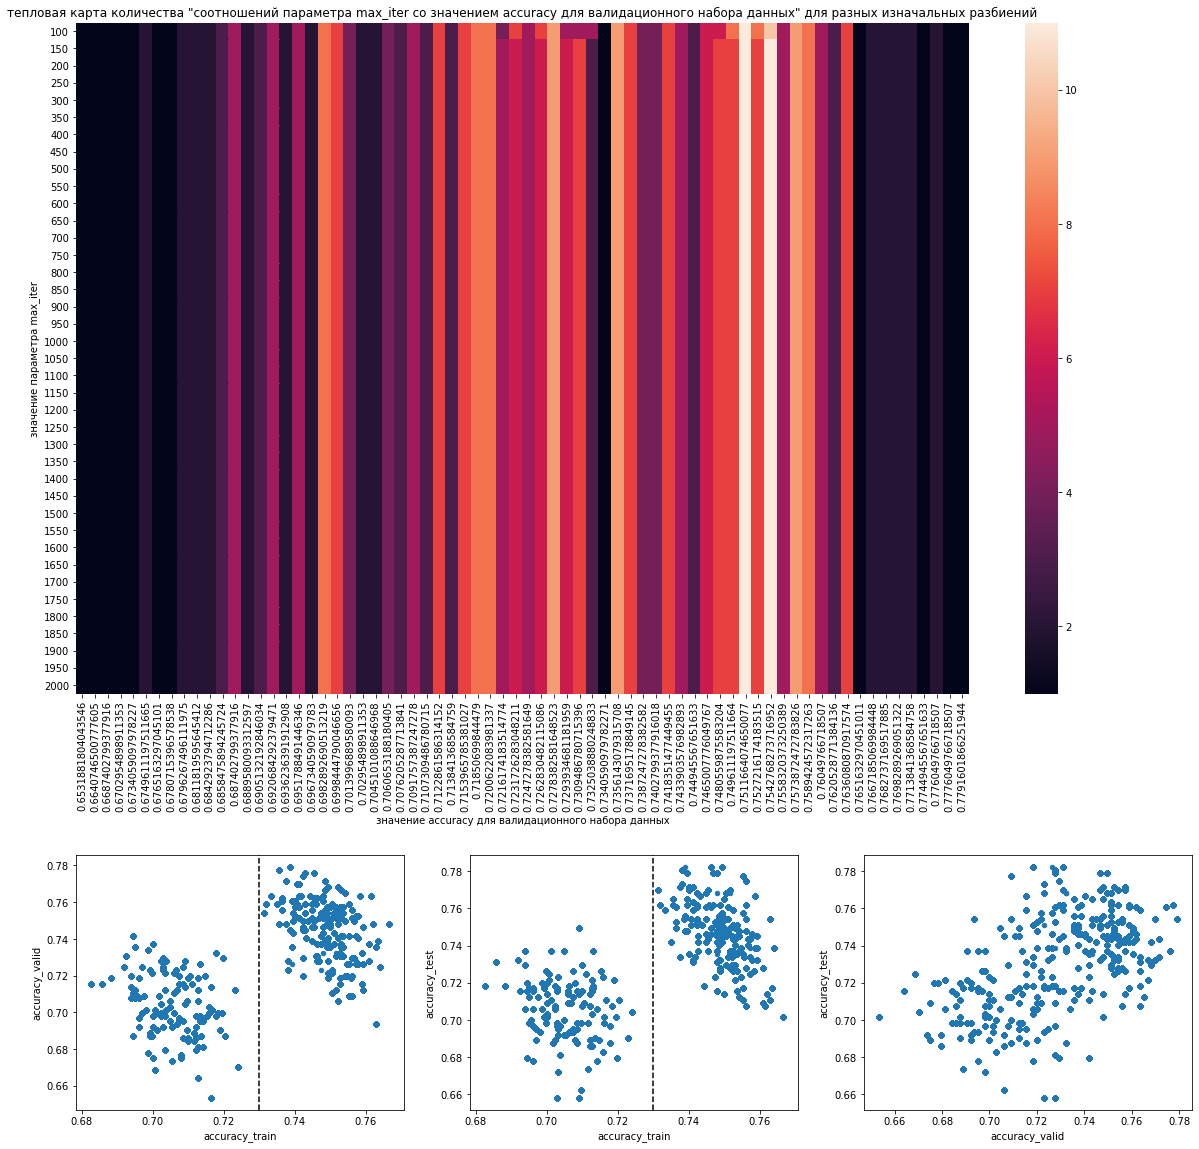

In [15]:
a = get_pivot_table(df_stat[df_stat.model == 'logistic_regression'])
display(a)

figure, grid = plt.figure(figsize=(20, 20)), GridSpec(8, 3)
figure.add_subplot(grid[0:5, :])
for i in range(3): figure.add_subplot(grid[-2:, i])
# линейка количества символов в строке 4 2345678 5 2345678 6 2345678 7 2345678 8 2345678 9 2345678 A 234|678 B 234567890
hh = two_colimn_cross_count(df_stat[df_stat.model == 'logistic_regression'], 'par1', 'accuracy_valid')
tmp = sns.heatmap(hh.T,ax=figure.axes[0])
figure.axes[0].set (ylabel='значение параметра max_iter',
    xlabel='значение accuracy для валидационного набора данных',
    title='тепловая карта количества "соотношений параметра max_iter со значением accuracy для\
 валидационного набора данных" для разных изначальных разбиений')

ax=df_stat[df_stat.model == 'logistic_regression'].plot.scatter(x='accuracy_train',
            y='accuracy_valid', ax=figure.axes[1])
ax=figure.axes[1].axvline(0.73, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'logistic_regression'].plot.scatter(x='accuracy_train',
            y='accuracy_test', ax=figure.axes[2])
ax=figure.axes[2].axvline(0.73, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'logistic_regression'].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[3])


Ну на диаграммах рассеяния видно 2 области с разным качеством обучения. Посмотрим, что будет, если отбросить зоны, левее секущей линии:

'Значения параметров при разных фильтрах:'

,corr valid and test,median accuracy train,median accuracy valid,median accuracy test
full,0.520,0.741,0.730,0.733
train,-0.250,0.749,0.748,0.747
valid,-0.010,0.748,0.751,0.745


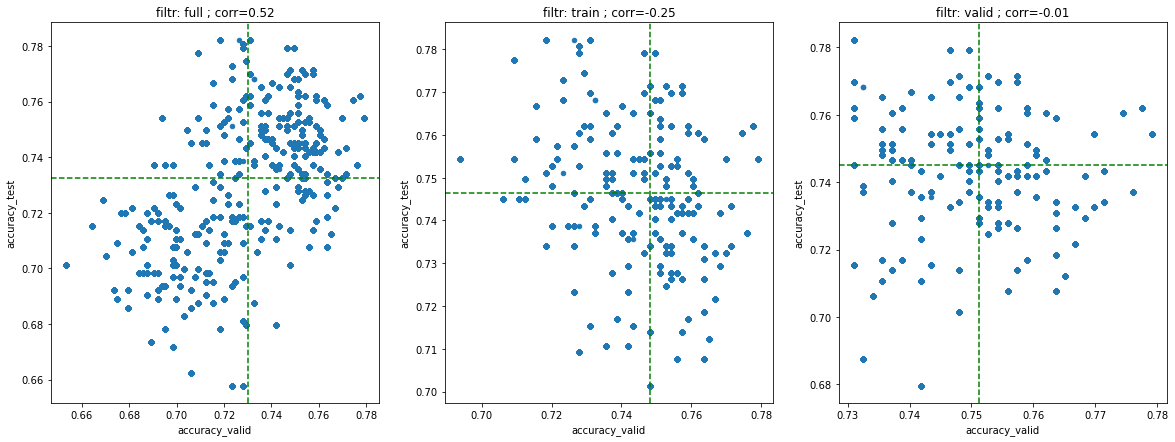

In [16]:
filtr['train']=(df_stat.model == 'logistic_regression')&(df_stat.accuracy_train>0.73)
filtr['valid']=(df_stat.model == 'logistic_regression')&(df_stat.accuracy_valid>0.73)
figure, grid = plt.figure(figsize=(20, 7)), GridSpec(1, 3)
for i in range(3): figure.add_subplot(grid[0, i])
rr=pd.DataFrame(columns=['corr valid and test','median accuracy train','median accuracy valid',
            'median accuracy test'], index=['full','train','valid'])
display('Значения параметров при разных фильтрах:')
for i, v in enumerate(['full','train','valid']):
    corr= round(df_stat[filtr[v]][['accuracy_valid','accuracy_test']].corr().iloc[1,0],2)
    rr.loc[v,'corr valid and test'] = corr
    median=df_stat[filtr[v]][['accuracy_train','accuracy_valid','accuracy_test']].median().to_list()
    rr.iloc[i,1:4] = median
    ax=df_stat[filtr[v]].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[i], title='filtr: '+v+' ; corr='+str(corr))
    ax=figure.axes[i].axvline(median[1], color='green', linestyle='--')
    ax=figure.axes[i].axhline(median[2], color='green', linestyle='--')
display(rr.style.format('{:.3f}'))

**Выводы:**
* **параметр max_iter конкретно на этом наборе данных после значения 150 не менялся при 300 разных разбиениях датафрейма.**
* **параметр max_iter конкретно на этих данных имеет смысл выставлять в 250, т.к. при этом с одной стороны модель уже точно обучится, с другой - ожидается близкое к минимальному время обучения и предсказания**
* **выбор начального разбиения существенно сильнее влияет на результат, чем выбор параметра max_iter**
* **корреляция значения accuracy для валидационной и тестовой выборки порядка 0.5. Т.е. взаимосвязь есть, но не прям уж очень сильная**
* **если дополнительно поставить фильтр accuracy_train>0.73, то это повысит медианное значение accurace на валидационной и тестовой выборках приблизительно на 0.016, но корелляция между ними станет отрицательной (-0.25)**

## исследование дерева решений

,,a_tr min,a_tr median,a_tr max,a_va min,a_va median,a_va max,a_te min,a_te median,a_te max,time fit min,time fit median,time fit max,time pred min,time pred median,time pred max
par1,par2,,,,,,,,,,,,,,,
1,,0.73,0.75,0.77,0.70,0.75,0.79,0.70,0.75,0.79,2.24,2.89,9.11,4.19,5.26,15.86
2,,0.77,0.79,0.80,0.74,0.78,0.82,0.72,0.78,0.82,2.80,3.66,9.33,4.34,5.54,14.39
3,,0.78,0.80,0.82,0.75,0.79,0.83,0.74,0.79,0.84,3.41,4.31,10.81,4.26,5.46,16.39
4,,0.79,0.81,0.83,0.75,0.79,0.82,0.73,0.79,0.84,3.88,5.02,14.21,4.38,5.47,14.88
5,,0.80,0.82,0.84,0.74,0.79,0.83,0.74,0.79,0.84,4.37,5.62,12.01,4.42,5.52,18.60
6,,0.81,0.83,0.86,0.75,0.79,0.83,0.74,0.79,0.83,4.86,6.21,12.98,4.49,5.48,18.08
7,,0.83,0.85,0.86,0.75,0.79,0.83,0.72,0.79,0.83,5.36,6.74,13.65,4.51,5.45,15.34
8,,0.84,0.86,0.88,0.74,0.79,0.82,0.73,0.79,0.83,5.84,7.23,13.70,4.48,5.43,18.73
9,,0.86,0.87,0.89,0.74,0.79,0.83,0.73,0.79,0.83,6.17,7.69,15.17,4.35,5.35,16.73


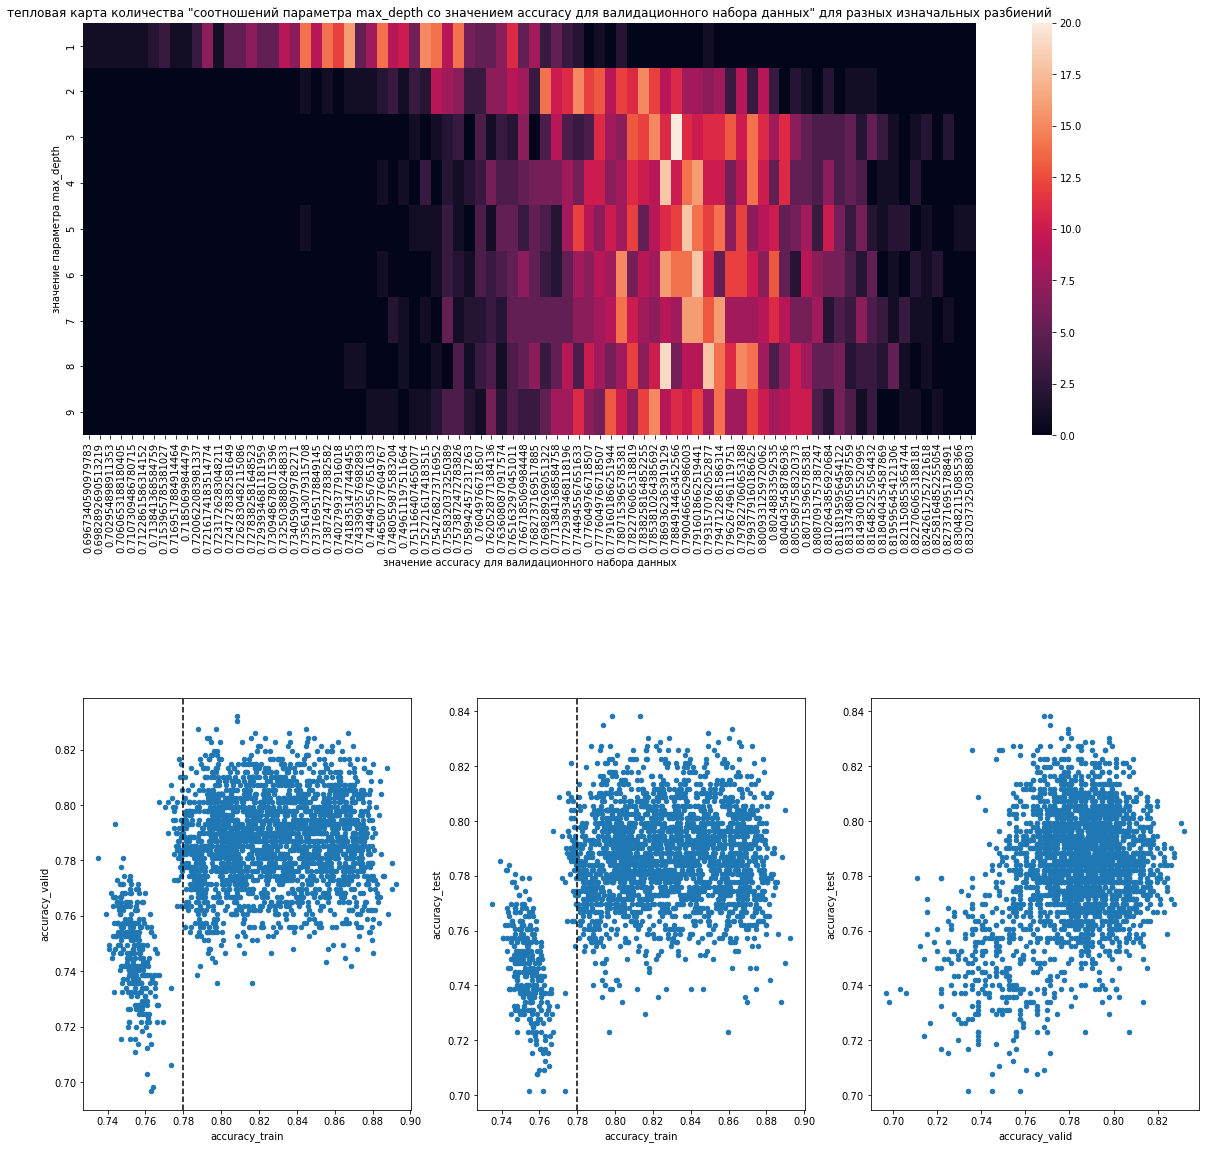

In [17]:
a = get_pivot_table(df_stat[df_stat.model == 'tree'])
display(a)

figure, grid = plt.figure(figsize=(20, 20)), GridSpec(5, 3)
figure.add_subplot(grid[0:-3, :])
for i in range(3): figure.add_subplot(grid[-2:, i])
# линейка количества символов в строке 4 2345678 5 2345678 6 2345678 7 2345678 8 2345678 9 2345678 A 234|678 B 234567890
hh = two_colimn_cross_count(df_stat[df_stat.model == 'tree'], 'par1', 'accuracy_valid')
tmp = sns.heatmap(hh.T,ax=figure.axes[0])
figure.axes[0].set (ylabel='значение параметра max_depth',
    xlabel='значение accuracy для валидационного набора данных',
    title='тепловая карта количества "соотношений параметра max_depth со значением accuracy для\
 валидационного набора данных" для разных изначальных разбиений')

ax=df_stat[df_stat.model == 'tree'].plot.scatter(x='accuracy_train',
            y='accuracy_valid', ax=figure.axes[1])
ax=figure.axes[1].axvline(0.78, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'tree'].plot.scatter(x='accuracy_train',
            y='accuracy_test', ax=figure.axes[2])
ax=figure.axes[2].axvline(0.78, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'tree'].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[3])

Ну с деревом зависимость от изначального разбиения тоже есть, и сильная, но и влияние гиперпараметра уже есть. Также имеется 2 зоны решений. Попробуем обрезать то, что левее секущих линий:

'Значения параметров при разных фильтрах:'

,corr valid and test,median accuracy train,median accuracy valid,median accuracy test
full,0.330,0.821,0.785,0.785
train,-0.090,0.828,0.788,0.787
valid,-0.050,0.828,0.795,0.787


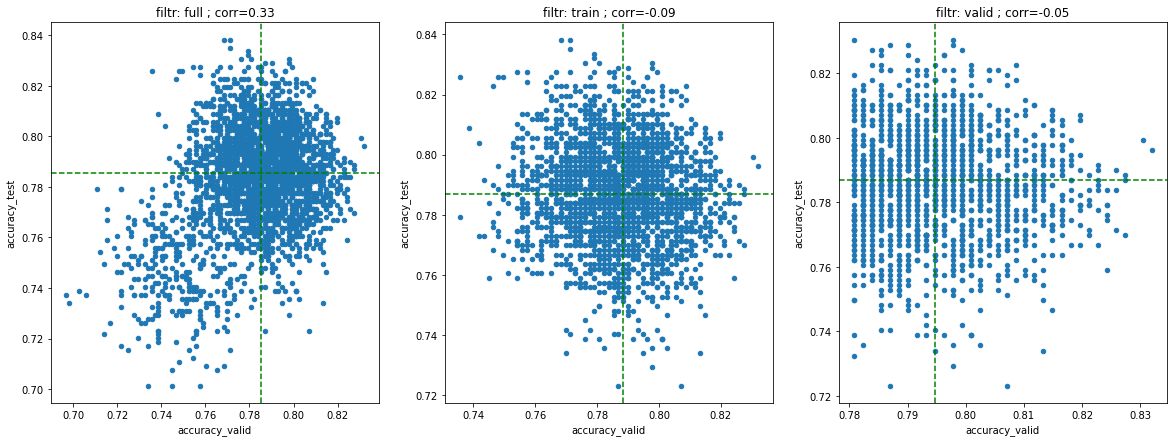

In [18]:
filtr['full']=df_stat.model == 'tree'
filtr['train']=(df_stat.model == 'tree')&(df_stat.accuracy_train>0.78)
filtr['valid']=(df_stat.model == 'tree')&(df_stat.accuracy_valid>0.78)
figure, grid = plt.figure(figsize=(20, 7)), GridSpec(1, 3)
for i in range(3): figure.add_subplot(grid[0, i])
rr=pd.DataFrame(columns=['corr valid and test','median accuracy train','median accuracy valid',
            'median accuracy test'], index=['full','train','valid'])
display('Значения параметров при разных фильтрах:')
for i, v in enumerate(['full','train','valid']):
    corr= round(df_stat[filtr[v]][['accuracy_valid','accuracy_test']].corr().iloc[1,0],2)
    rr.loc[v,'corr valid and test'] = corr
    median=df_stat[filtr[v]][['accuracy_train','accuracy_valid','accuracy_test']].median().to_list()
    rr.iloc[i,1:4] = median
    ax=df_stat[filtr[v]].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[i], title='filtr: '+v+' ; corr='+str(corr))
    ax=figure.axes[i].axvline(median[1], color='green', linestyle='--')
    ax=figure.axes[i].axhline(median[2], color='green', linestyle='--')
display(rr.style.format('{:.3f}'))

**Выводы:**
* **выставление фильтра accuracy_train>0.78 поднимает медианное значение accuracy на валидационной и тестовых выборках на 0,02. Ну то есть это просто отсеивает незначительное количество выбросов, практически не влияя наиболее вероятный вариант обучения модели.**
* **медианное значение accuracy по предсказаниям модели с деревом решений 0.787 против 0.747 у модели логистической регрессии.**
* **Значение гиперпараметра max_deph 1 и 2 дают модели с значительно худшими способностями к предсказаниям.**
* **Наибольшее количество моделей с самыми большими значениями accuracy для валидационной выборки (0.832) получается при задании гиперпараметра max_deph = 5.** Но опять-таки, для получения наилучших результатов **необходимо** эксперементировать с разными разбиениями исходного датафрейма.

## исследование случайного леса

Так как тут будет зависимость от двух параметров, то тепловую карту нужно использовать другую. Цветом будет показана accuracy.

<div class="alert alert-block alert-success">
    
<b>Успех:</b> 👍
</div>


In [19]:
def two_colimn_cross_count2(data,column1,column2, values, aggfunc):
    result=pd.DataFrame(columns=sorted(data[column1].unique()), index=sorted(data[column2].unique()))
    result=result.fillna(0)
    pivot_table=data.pivot_table(index=[column1,column2], values=values, aggfunc = aggfunc).reset_index()
    for i,v in pivot_table.iterrows():
        result.loc[v[column2],v[column1]] = v[values]
    return result

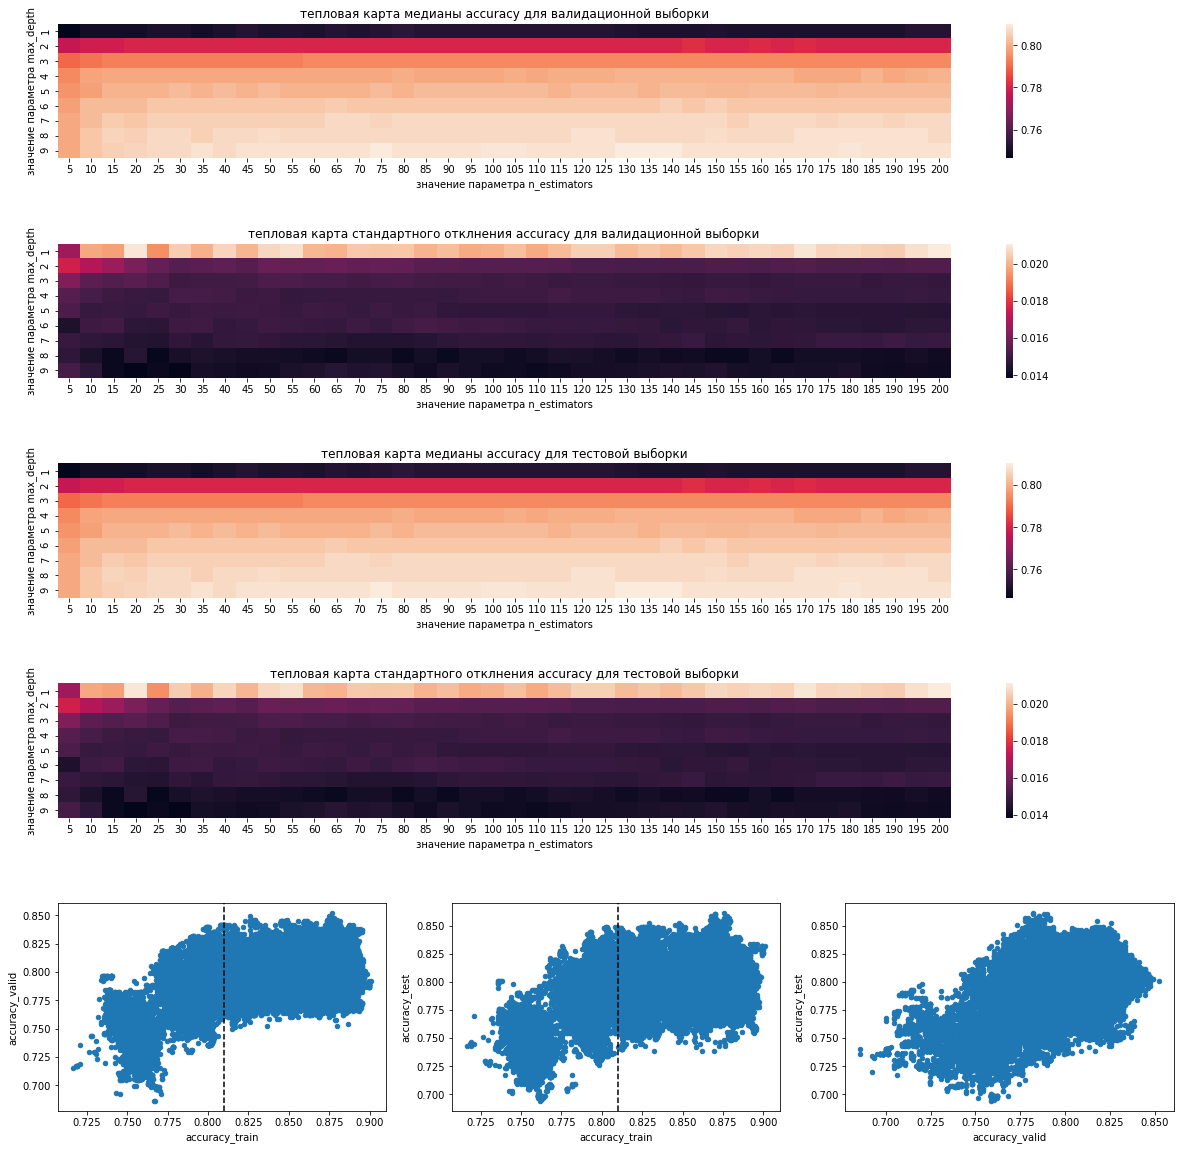

In [20]:
a = get_pivot_table(df_stat[df_stat.model == 'forest'])
#display(a)

figure, grid = plt.figure(figsize=(20, 20)), GridSpec(15, 3)
figure.add_subplot(grid[0:2, :])
figure.add_subplot(grid[3:5, :])
figure.add_subplot(grid[6:8, :])
figure.add_subplot(grid[9:11, :])
for i in range(3): figure.add_subplot(grid[-3:, i])
# линейка количества символов в строке 4 2345678 5 2345678 6 2345678 7 2345678 8 2345678 9 2345678 A 234|678 B 234567890
hh = two_colimn_cross_count2(df_stat[df_stat.model == 'forest'], 'par1', 'par2','accuracy_valid','median')
tmp = sns.heatmap(hh.T,ax=figure.axes[0])
figure.axes[0].set (ylabel='значение параметра max_depth',
    xlabel='значение параметра n_estimators',
    title='тепловая карта медианы accuracy для валидационной выборки')

hh = two_colimn_cross_count2(df_stat[df_stat.model == 'forest'], 'par1', 'par2','accuracy_valid','std')
tmp = sns.heatmap(hh.T,ax=figure.axes[1])
figure.axes[1].set (ylabel='значение параметра max_depth',
    xlabel='значение параметра n_estimators',
    title='тепловая карта стандартного отклнения accuracy для валидационной выборки')

hh = two_colimn_cross_count2(df_stat[df_stat.model == 'forest'], 'par1', 'par2','accuracy_valid','median')
tmp = sns.heatmap(hh.T,ax=figure.axes[2])
figure.axes[2].set (ylabel='значение параметра max_depth',
    xlabel='значение параметра n_estimators',
    title='тепловая карта медианы accuracy для тестовой выборки')

hh = two_colimn_cross_count2(df_stat[df_stat.model == 'forest'], 'par1', 'par2','accuracy_valid','std')
tmp = sns.heatmap(hh.T,ax=figure.axes[3])
figure.axes[3].set (ylabel='значение параметра max_depth',
    xlabel='значение параметра n_estimators',
    title='тепловая карта стандартного отклнения accuracy для тестовой выборки')


ax=df_stat[df_stat.model == 'forest'].plot.scatter(x='accuracy_train',
            y='accuracy_valid', ax=figure.axes[4])
ax=figure.axes[4].axvline(0.81, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'forest'].plot.scatter(x='accuracy_train',
            y='accuracy_test', ax=figure.axes[5])
ax=figure.axes[5].axvline(0.81, color='k', linestyle='--')
ax=df_stat[df_stat.model == 'forest'].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[6])

* **Значения гиперпараметра max_deph 1-3 формируют модели с значительно худшими параметрами accuracy**
* **При значении гипераметра max_deph 8 и 9 получаются модели с максимальными медианными значениями accuracy, при этом уменьшается и стандартное отклонение accuracy (стабильно хорошее качество).**
* **самые лучшие медианные показатели accuracy достигаются когда значение max_depth = 9 (возможно есть и лучшие решения, когда параметр больше 9, но они остались вне исследования), а значение параметра n_estimators равно 75, или в диапазоне \[130-140\].**

Посмотрим, что даст применение фильтра к accuracy train:

'Значения параметров при разных фильтрах:'

,corr valid and test,median accuracy train,median accuracy valid,median accuracy test
full,0.480,0.822,0.798,0.796
train,-0.090,0.850,0.804,0.802
valid,-0.020,0.852,0.816,0.799


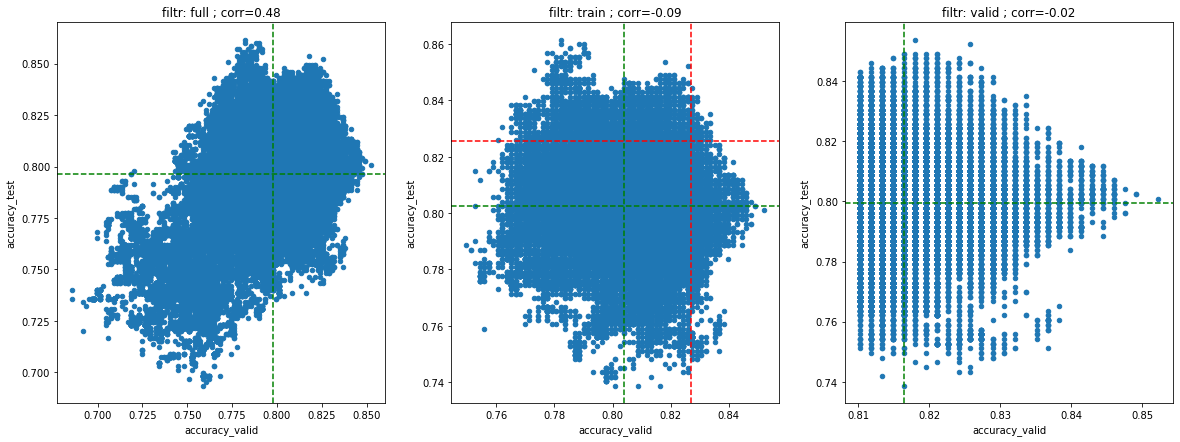

In [21]:
filtr['full']=df_stat.model == 'forest'
filtr['train']=(df_stat.model == 'forest')&(df_stat.accuracy_train>0.81)
filtr['valid']=(df_stat.model == 'forest')&(df_stat.accuracy_valid>0.81)
figure, grid = plt.figure(figsize=(20, 7)), GridSpec(1, 3)
for i in range(3): figure.add_subplot(grid[0, i])
rr=pd.DataFrame(columns=['corr valid and test','median accuracy train','median accuracy valid',
            'median accuracy test'], index=['full','train','valid'])
display('Значения параметров при разных фильтрах:')
for i, v in enumerate(['full','train','valid']):
    corr= round(df_stat[filtr[v]][['accuracy_valid','accuracy_test']].corr().iloc[1,0],2)
    rr.loc[v,'corr valid and test'] = corr
    median=df_stat[filtr[v]][['accuracy_train','accuracy_valid','accuracy_test']].median().to_list()
    rr.iloc[i,1:4] = median
    ax=df_stat[filtr[v]].plot.scatter(x='accuracy_valid',
            y='accuracy_test', ax=figure.axes[i], title='filtr: '+v+' ; corr='+str(corr))
    ax=figure.axes[i].axvline(median[1], color='green', linestyle='--')
    ax=figure.axes[i].axhline(median[2], color='green', linestyle='--')
    if i == 1: # v2
        ax=figure.axes[i].axvline(median[1] + 0.023, color='red', linestyle='--') #v2
        ax=figure.axes[i].axhline(median[2] + 0.023, color='red', linestyle='--') #v2
display(rr.style.format('{:.3f}'))

* **фильтр accuracy_train>0.81 поднимает медианное значение accuracy для валидационной и тестовой выборок на 0.006**
* **нет смысла при обучении модели стараться максимизировать значение accuracy для валидационной выборки, т.к. при нем знчение accuracy для тестовой выборки почти наверняка окажется медианным.**

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо проделан шаг. Радует наличие информативых таблиц и графиков.  Каждый этап подкрепленным грамотными выводами
</div>

<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> без визуализации диаграммы рассеяния для тестовой и валидационной выборок, я бы не скоро сообразил, что брать просто максимальное значение параметра для валидационной выборки - не самая лучшая идея. На втором графике красными секущими пометил область, которая, как мне кажется, должна давать стабильно чуть лучшие предсказания. 
</div>

<div class="alert alert-block alert-success">
<b>Ответ[2]:</b> Но использовать диаграмму рассеяния для тестовой выборки - не хорошо. Именно в этом и заключался мой прошлый комментарий. Чтобы оптимальные гиперпараметры отбирались без участия валидационной выборки, можно использовать  ранее упомонятую кросс-валидацию, которая помогает найти оптимальные значения понадежнее, чем просто валидационная выборка.
</div>

<div class="alert alert-info">
<b>Совет:</b> 

1) Вот здесь после исследовательской части - хорошо выбрать модель и провести для нее оценивание на тестовой выборке
    
2) А после неплохо было бы проверить ее на адекватность (то есть сравнить модель с фиктивной/случайной, может нам стоит всегда предсказывать наибольший класс и результат будет не хуже. Для данной задачи удобен инструмент DummyClassifier)
    
3) И неплохо было бы написать общий итоговый вывод

</div>


<div class="alert alert-block alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<b>Комментарий студента:</b> Все ячейки ниже добавлены во второй версии
</div>

Значение параметра, выше которого находятся интересные нам модели:

In [22]:
filtr=(df_stat.model == 'forest') & (df_stat.accuracy_valid > 0.804)
av = df_stat[filtr].accuracy_valid.describe()['75%']
f'{av:.3f}'

'0.820'

Тип и количество моделей, поторые преодолели этот порог:

In [23]:
filtr = df_stat.accuracy_valid > 0.804 + 0.023 #0.827
tmp = df_stat[filtr].model.value_counts()
tmp.forest = tmp.forest // ((205-5)/5)
tmp

forest    99
tree       5
Name: model, dtype: int64

Выбираем лес.  
Смотрим значения гиперпараетров, при которых количество сгенерированных моделей преодолевших порог больше некой константы:

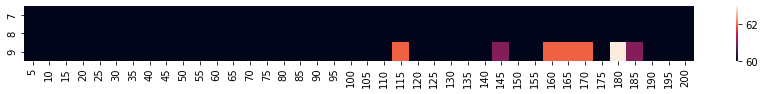

In [24]:
filtr = (df_stat.accuracy_valid > av) & (df_stat.model == 'forest') & (df_stat.par1 > 6)
tmp = (df_stat[filtr].pivot_table(index=['par1','par2'], values = 'accuracy_valid', aggfunc='count')
.reset_index().sort_values('accuracy_valid',ascending=False)
      )
tmp2 = two_colimn_cross_count2(tmp,'par1','par2','accuracy_valid','first')
fig, ax = plt.subplots(figsize=(15, 1))
dev_null = sns.heatmap(tmp2.T, vmin=60)

А с лучшими харектеристиками были \[75,130,135,140\]. Все-таки это выбросы.  
Просто для себя: диаграмма рассеяния accuracy на тренировочной и валидационных выборках для "лучших" моделей:

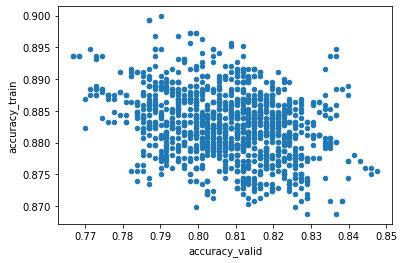

In [25]:
filtr = (df_stat.model == 'forest') & (df_stat.par1 == 9) & (df_stat.par2.isin([75,130,135,140]))
dev_null =df_stat[filtr].plot.scatter(x='accuracy_valid', y='accuracy_train')

In [26]:
data.calls=data.calls.astype(int)
data.messages = data.messages.astype(int)
data.is_ultra = data.is_ultra.astype(bool)
#data.is_ultra

upd: Похоже, train_test_split сбрасывает тип столбцов во float.  
Немножко по другому построим модели: датафрейм, с тренировочными / валидационными данными разделим на 8 кусочков, и из них составим 8 комбинаций тренировочного/валидационного датафрейма. Обучим и посчитаем метрику для каждых 8 вариантов:

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт)

In [27]:
df_stat2=pd.DataFrame(columns=['i_rnd', 'i_prnd', 'n', 'n_estimators', 'a_train', 'a_val'])
def data_div(list_dataframe, random_state, pow2):
    '''
    Делим датафрейм на равные кусочки. Количество кусочков - степерь двойки
    '''
    if pow2 != 0:
        new_list=[]
        for i in list_dataframe:
            tmp1, tmp2 = train_test_split(i, test_size = 0.5, random_state = random_state,
                                stratify=i.is_ultra)
            new_list.append(tmp1)
            new_list.append(tmp2)
        return data_div(new_list, random_state, pow2 - 1)
    else: return [list_dataframe]

def data_split(data, random_state, pow2=4):
    '''
    Датафрейм делится 2**pow2 частей. По очереди изымается один, остальные склеиваются.
    На выход подается список подготовленных таким образом поддатафреймов.
    '''
    div_dataframe = data_div([data], random_state, pow2)[0]
    #print(f'{len(div_dataframe)=} {pow2=}')
    res=[]
    for i in range(2**pow2):
        tmp=pd.DataFrame(columns=data.columns)
        for j in range(2**pow2):
            if i!= j: tmp = tmp.append(div_dataframe[j])
        res.append({'train': tmp, 'valid': div_dataframe[i]})
    return res

    
def get_forest(data, i_rnd, i_prnd, test_size, df_stat2):
    temp, df['test'] = train_test_split(data, test_size = test_size, random_state = i_prnd)
    features['test'] = df['test'].drop(['is_ultra'], axis=1)
    target['test'] = df['test'].is_ultra
    temp = data_split(data, i_prnd, 3) # 8 подвыборок
    for i in range(len(temp)):
        df['train'] = temp[i]['train']
        df['valid'] = temp[i]['valid']
        for tmp in ['train', 'valid']:
            features[tmp] = df[tmp].drop(['is_ultra'], axis=1)
            target[tmp] = df[tmp].is_ultra.astype(bool)
        for n_estimators in [115, 145, 160, 165, 170, 180, 185]:
                model = RandomForestClassifier(random_state = i_prnd,
                    max_depth = 9, n_estimators=n_estimators)
                model.fit(features['train'], target['train'])
                for j in ['train','valid']:
                    predictions = model.predict(features[j])
                    accuracy[j] = accuracy_score(target[j], predictions)
                df_stat2[0].loc[len(df_stat2[0])] = [i_rnd, i_prnd, i, n_estimators, accuracy['train'],
                                                     accuracy['valid']]

need_new_generate = False
if need_new_generate:
    for i_rnd in range(1000):
        t1=time.time()
        i_prnd = psevdo_rnd(i_rnd)
        get_forest(data, i_rnd, i_prnd, 0.15, [df_stat2])
        print(f'{i_rnd=} ', end='')
        df_stat2.to_csv(r'09_df-stat2.csv', index=False)
else:
    try:
        df_stat2 = pd.read_csv('09_df-stat2.csv')
    except:
        df_stat2 = pd.read_csv('https://gifara.ru/ds/09_df-stat2.csv')   

In [28]:
df_stat2.head()

,i_rnd,i_prnd,n,n_estimators,a_train,a_val
0,0.0,0.0,0.0,115.0,0.882332,0.783042
1,0.0,0.0,0.0,145.0,0.880910,0.780549
2,0.0,0.0,0.0,160.0,0.881266,0.775561
3,0.0,0.0,0.0,165.0,0.881621,0.775561
4,0.0,0.0,0.0,170.0,0.880910,0.773067


In [29]:
tmp3=two_colimn_cross_count2(df_stat2,'i_rnd','n_estimators','a_val','min')
#tmp3

Визуализируем то, что насчиталось (минимальное значение accuracy в блоке из 8 разбиений):

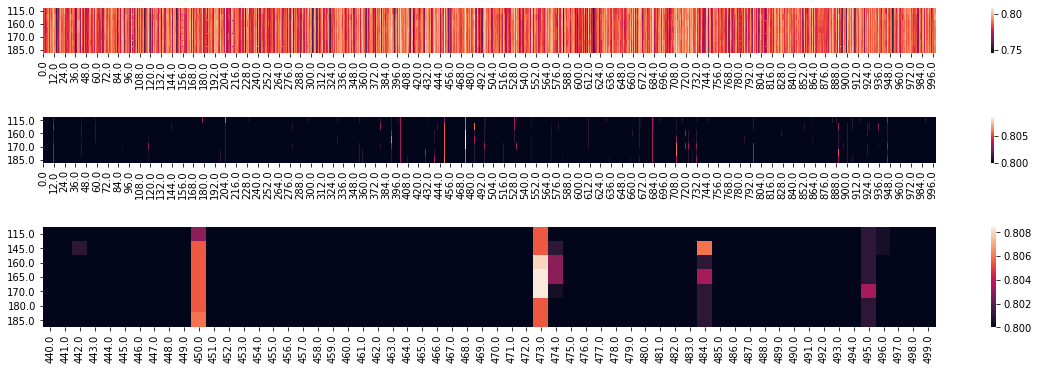

In [30]:
figure, grid = plt.figure(figsize=(20, 20)), GridSpec(20, 6)
figure.add_subplot(grid[0,:])
figure.add_subplot(grid[2,:])
figure.add_subplot(grid[4:6,:])

dev_null=sns.heatmap(tmp3, ax=figure.axes[0])
dev_null=sns.heatmap(tmp3, vmin=0.80, ax=figure.axes[1])
dev_null=sns.heatmap(tmp3.iloc[:,440:500], vmin=0.80, ax=figure.axes[2])

In [31]:
best_modeles = df_stat2[(df_stat2.i_rnd==473)&(df_stat2.n_estimators.isin([165,170]))]

In [32]:
best_modeles.groupby('n_estimators')[['a_train','a_val']].describe()

a_train                                                    \
               count      mean       std       min       25%       50%   
n_estimators                                                             
165.0            8.0  0.876611  0.001798  0.874156  0.875356  0.876600   
170.0            8.0  0.876478  0.001683  0.874156  0.875533  0.876422   

                                 a_val                                         \
                   75%       max count      mean       std       min      25%   
n_estimators                                                                    
165.0         0.877789  0.879445   8.0  0.811761  0.003235  0.808458  0.80997   
170.0         0.877522  0.879090   8.0  0.812072  0.003265  0.808458  0.80997   

                                            
                   50%       75%       max  
n_estimators                                
165.0         0.810945  0.813084  0.818408  
170.0         0.811956  0.813433  0.818408

При n_estimators = 165 чуть выше медианное значение, поэтому выбираем это значение гиперпараметра.

In [33]:
best_modeles.i_prnd.astype(int).unique()

array([3533020376])

In [34]:
model = RandomForestClassifier(random_state = 3533020376, max_depth = 9, n_estimators=165)
df['train'], df['test'] = train_test_split(data, test_size = 0.15, random_state = 3533020376)
for tmp in ['train', 'test']:
    features[tmp] = df[tmp].drop(['is_ultra'], axis=1)
    target[tmp] = df[tmp].is_ultra.astype(bool)
model.fit(features['train'], target['train'])
for j in ['train','test']:
    predictions = model.predict(features[j])
    accuracy[j] = accuracy_score(target[j], predictions)
f"Значение accuracy, вычисленное по выбранной модели {accuracy['test']:.3f}"


'Значение accuracy, вычисленное по выбранной модели 0.810'

На тестовой выборке значение метрики выше медианной в первой части задания.

In [35]:
dummy = DummyClassifier(strategy='most_frequent').fit(features['train'], target['train'])
predictions = dummy_pred = dummy.predict(features['test'])
f"Значение accuracy, вычисленное по модели dummy:{accuracy_score(target['test'], predictions):.3f}"

'Значение accuracy, вычисленное по модели dummy:0.702'

Общие выводы:
* Для всех моделей наблюдается критическая зависимость качества предсказаний моделей от выбора первичного разбиения датафрейма.
* В первой части задания было проведено исследование, какие модели и какие гиперпараметры дают наилучшие результаты на данном датасете. С существенным отрывом победил случайный лес c глубиной обучения 9.
* Во второй части проводилось обучение моделей при разных первичных разбиениях датафрейма с целью определить оптимальный для обучения набор данных.
* В третьей части была обучена модель на данных, выбранных во второй части с гиперпараметрами, выбранных в первой. На тестовой выборке значение accuracy имеет значение 0.81
* В четвертой части было произведено сравнение результата с результатом модели dummy (всегда возвращает наиболее вероятное часто встречающееся значение) на этом же датасете. "Рабочая" модель предсказывает правильный результат на 11% чаще.


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
